In [41]:
from sklearn import datasets
import numpy as np

In [42]:
iris= datasets.load_iris()
X= iris.data[:, [2,3]]
y= iris.target
print("Class labels: ", np.unique(y))

Class labels:  [0 1 2]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

In [44]:
print('labels count in y: ' , np.bincount(y))

labels count in y:  [50 50 50]


In [45]:
print('labels count in y_train: ', np.bincount(y_train))

labels count in y_train:  [35 35 35]


In [46]:
print('labels count in y_test: ', np.bincount(y_test))

labels count in y_test:  [15 15 15]


In [ ]:
#Data cleaning module

In [47]:
from sklearn.linear_model import Perceptron

In [48]:
ppn= Perceptron(eta0=0.01, random_state= 1)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
y_pred= ppn.predict(X_test)
print("missclassificatioon: %d " % (y_test != y_pred).sum())

missclassificatioon: 15 


In [50]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.667


In [51]:
print('Accuracy: %.3f' % ppn.score(X_test, y_test))

Accuracy: 0.667


In [52]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [53]:
def plot_decision_regions(X,y, classifier, test_idx= None, resolution= 0.02):
    markers= ('s','x','o','^','v')
    colors= ('red', 'blue', 'lightgreen','gray', 'cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max= X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max= X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2= np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min, x2_max, resolution))
    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor= 'black')
        if test_idx:
            X_test, y_test= X[test_idx,:], y[test_idx]
            plt.scatter(X_test[:,0], X_test[:,1], c='', edgecolor='black', alpha=1.0, linewidth= 1, marker='o',s=100,label='test set')
            

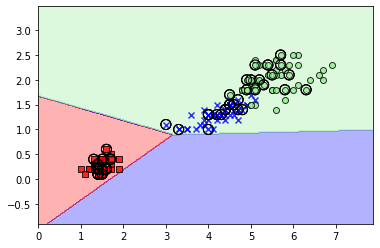

In [55]:
X_combined= np.vstack((X_train, X_test))
y_combined= np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined, y=y_combined,classifier=ppn, test_idx= range(105,150))

# Logistic regression

In [56]:
class LogisticRegressionGD(object):
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta=eta
        self.n_iter= n_iter
        self.random_state= random_state
        
    def fit(self, X,y):
        rgen= np.random.RandomState(self.random_state)
        self.w_= rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input= self.net_input(X)
            output= self.activation(net_input)
            errors= (y-output)
            self.w_[1:]+= self.eta * X.T.dot(errors)
            self.w_[0] += self.eta* errors.sum()
            cost= (-y.dot(np.log(output))- ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:])+ self.w_[10]
    
    def activation(self,z):
        return 1. / (1.+np.exp(-np.clip(z,-250,250)))
    
    def predict(self,X):
        return np.where(self.net_input(X)>= 0.0, 1,0)
    

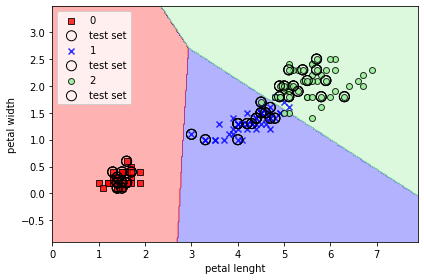

In [61]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(C=100.0, random_state=1, solver= 'lbfgs', multi_class='ovr')
lr.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined, classifier=lr, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
weights, params= [],[]
for c in np.arange(-5,5):
    lr= LogisticRegression(C=10.**c, random_state= 1, solver= 'lbfgs', multi_class='ovr')
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights= np.array(weights)

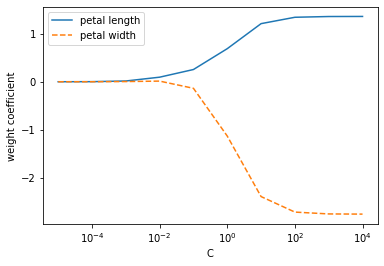

In [63]:
plt.plot(params, weights[:,0], label='petal length')
plt.plot(params, weights[:,1], linestyle= '--', label= 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc= 'upper left')
plt.xscale('log')
plt.show()

# SVM

In [64]:
from sklearn.svm import SVC

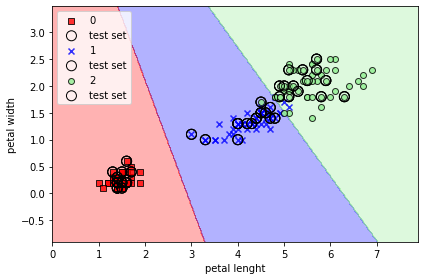

In [65]:
svm= SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [66]:
from sklearn.svm import SGDClassifier
ppn= SGDClassifier(loss='perceptron')
lr= SGDClassifier(loss='log')
svm= SGDClassifier(loss='hinge')

ImportError: cannot import name 'SGDClassifier' from 'sklearn.svm' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/__init__.py)

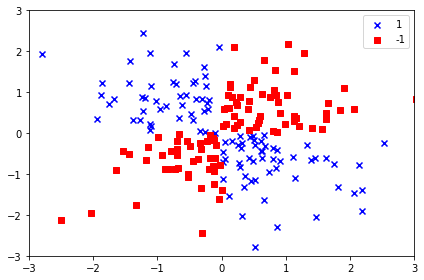

In [69]:
np.random.seed(1)
X_xor= np.random.randn(200,2)
y_xor= np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor= np.where(y_xor,1,-1)
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1,1], c='b',marker='x', label='1')
plt.scatter(X_xor[y_xor==-1,0], X_xor[y_xor==-1,1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

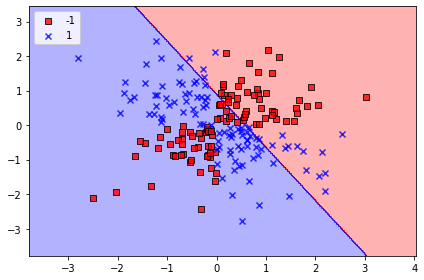

In [70]:
svc= SVC(kernel='rbf', random_state=1, gamma= 0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

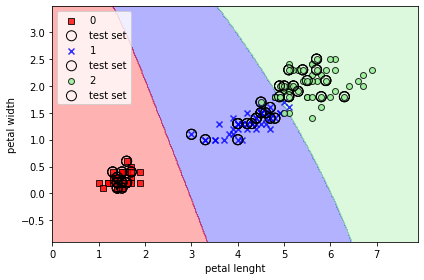

In [72]:
svm= SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier= svm, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

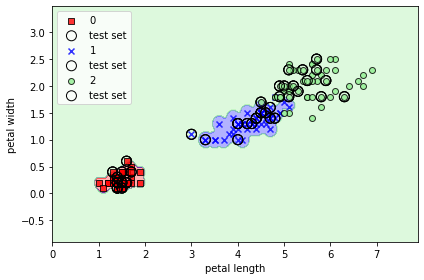

In [73]:
svm= SVC(kernel='rbf', random_state=1, gamma= 100.0, C=1.0)
svm.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=svm, test_idx= range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Decision tree Learning

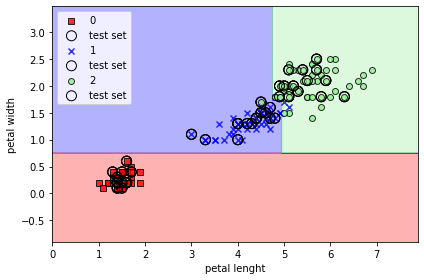

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_model= DecisionTreeClassifier(criterion='gini',max_depth= 4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined= np.vstack((X_train,X_test))
y_combined= np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier= tree_model, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

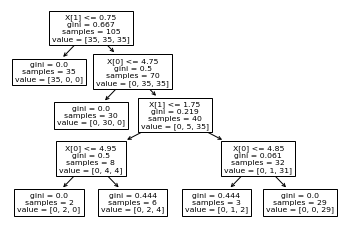

In [75]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

# Random Forests

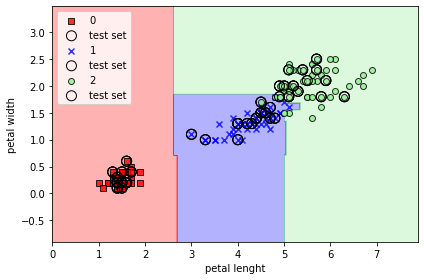

In [84]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(criterion='gini',n_estimators= 25, random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined, classifier=forest, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# KNN 

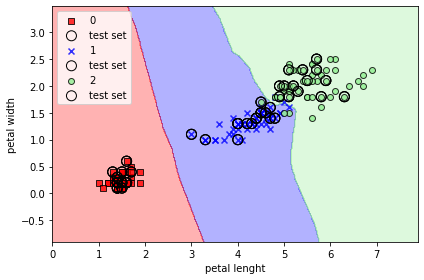

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(5,p=2,metric='minkowski')
knn.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=knn, test_idx= range(105,150))
plt.xlabel('petal lenght')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
